#### Maximum edges that can be added to DAG so that it remains DAG

A DAG is given to us, we need to find maximum number of edges that can be added to this DAG, after which new graph still remain a DAG that means the reformed graph should have maximal number of edges, adding even single edge will create a cycle in graph.

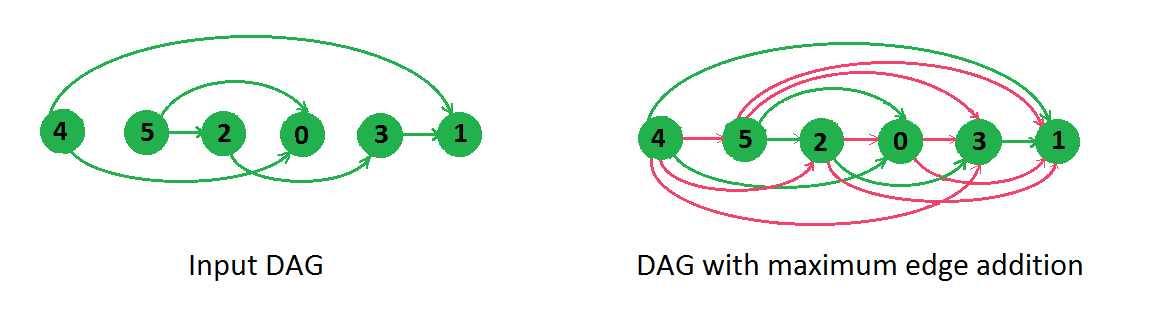

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Topological Sort/img/DAG.png")

The Output for above example should be following edges in any order.

4-2, 4-5, 4-3, 5-3, 5-1, 2-0, 2-1, 0-3, 0-1

As shown in above example, we have added all the edges in one direction only to save ourselves from making a cycle. This is the trick to solve this question. We sort all our nodes in topological order and create edges from node to all nodes to the right if not there already. 
How can we say that, it is not possible to add any more edge? the reason is we have added all possible edges from left to right and if we want to add more edge we need to make that from right to left, but adding edge from right to left we surely create a cycle because its counter part left to right edge is already been added to graph and creating cycle is not what we needed. 
So solution proceeds as follows, we consider the nodes in topological order and if any edge is not there from left to right, we will create it. 

Below is the solution, we have printed all the edges that can be added to given DAG without making any cycle. 

In [2]:
class Graph:
	def __init__(self, V):
		self.V = V
		self.adj = [[] for i in range(V)]
		self.indegree = [0 for i in range(V)]

	def addEdge(self, v, w):
		self.adj[v].append(w)
		self.indegree[w] += 1

	def topologicalSort(self):
		topological = []
		q = []
		for i in range(self.V):
			if (self.indegree[i] == 0):
				q.append(i)

		while (len(q) != 0):
			t = q[0]
			q.pop(0)
			topological.append(t)
			for j in self.adj[t]:
				self.indegree[j] -= 1
				if (self.indegree[j] == 0):
					q.append(j)

		return topological

	def maximumEdgeAddition(self):
		visited = [False for i in range(self.V)]
		topo = self.topologicalSort()
		for i in range(len(topo)):
			t = topo[i]

			for j in self.adj[t]:
				visited[j] = True

			for j in range(i + 1, len(topo)):
				if (not visited[topo[j]]):
					print(str(t) + '-' +
						str(topo[j]), end=' ')

				visited[topo[j]] = False

if __name__ == '__main__':
	g = Graph(6)
	g.addEdge(5, 2)
	g.addEdge(5, 0)
	g.addEdge(4, 0)
	g.addEdge(4, 1)
	g.addEdge(2, 3)
	g.addEdge(3, 1)
	g.maximumEdgeAddition()

4-5 4-2 4-3 5-3 5-1 2-0 2-1 0-3 0-1 

#### Time complexity : O(V + E) 

#### Space complexity : O(V + E) 

#### Optimized approach for finding only the number of edges that can be added

If we have to find only the maximum number of edges that can be added, it can be solved simply by understanding the following observation. If a DAG has n nodes, it has n nodes in it’s topological sort as well. The maximum number of edges a DAG can have can be determined by finding the maximum number of nodes that can be linked with each node. This implies the first node is connected to (n-1) nodes, the second node is connected to (n-2) nodes until the last node is not connected to any node. The reason for this decreasing pattern is because any edge from right node to the left node of the topological sort creates a cycle and it’ll no longer be a DAG. 

This means a DAG of n nodes can have a maximum number of
(n-1) + (n-2) + (n-3) + . . . 3 + 2 + 1 = n*(n-1)/2 edges

If the DAG already has E edges, then the maximum number of additional edges that can be added is given by (n*(n-1)/2 – E) which will be our final answer.

Below is the code implementation of the optimized approach

In [3]:
def max_edges(V,E):
	return V*(V-1)//2 - E

V = 6
E = 6
print("Maximum number of edges that can be added to maintain DAG is",max_edges(V,E))


Maximum number of edges that can be added to maintain DAG is 9



#### Time Complexity: O(1)

#### Auxiliary Space: O(1)